**Summary:->**<br>
The Iris flower classification problem is a popular problem in machine learning and it is often used as a benchmark for classification algorithms. It is a problem of classifying the species of an Iris flower based on certain characteristics such as sepal length, sepal width, petal length, and petal width.               


### _Importing required libraries_

In [107]:
import sklearn 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Collecting and preparing data for analysis

In [108]:
# loading the data from csv file to a pandas Dataframe
data=pd.read_csv("Iris.csv")

### Performing EDA

In [109]:
print("Top 5 rows :\n",data.head(5)) 

Top 5 rows :
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [110]:
print("Bottom 5 rows :\n",data.tail(5)) 

Bottom 5 rows :
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [111]:
# Checking  datatypes  in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [112]:
# Checking Column Headings
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [113]:
# checking the number of rows and columns in the dataframe
print("Rows :",data.shape[0], "\nColumns :", data.shape[1])

Rows : 150 
Columns : 6


In [114]:
# Counting  value of each column
data.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [115]:
# Finding null values in data
print("Null values :\n\n",data.isnull().sum())

Null values :

 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [116]:
# Summarizing Data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [117]:
# Since the id column has no actual application in our program we'll get rid or it by, dropping the Id column by indexing
df = data.drop(data.columns[[0]], axis=1)

###  Visualizations

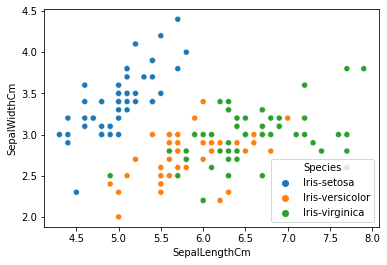

In [118]:
# Scatter plot
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.show()

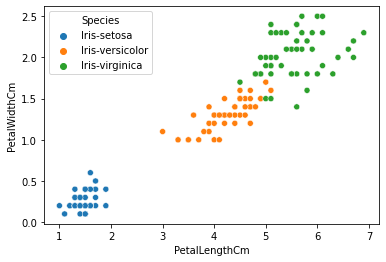

In [119]:
# Scatter plot
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)
plt.show()

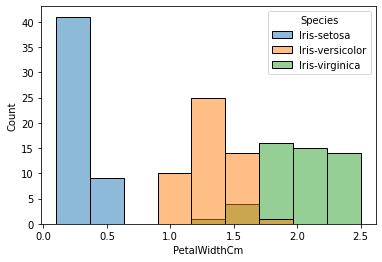

In [120]:
# Histogram for Petal Width
sns.histplot(data=data, x='PetalWidthCm', hue='Species')
plt.show()

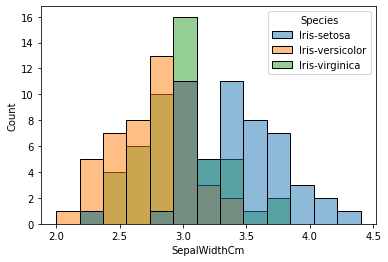

In [121]:
# Histogram for Sepal Width
sns.histplot(data=data, x='SepalWidthCm', hue='Species')
plt.show()

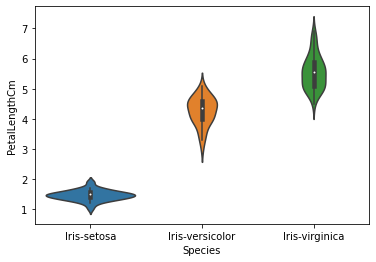

In [122]:
# Violin plot
sns.violinplot(x='Species', y='PetalLengthCm', data=data)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

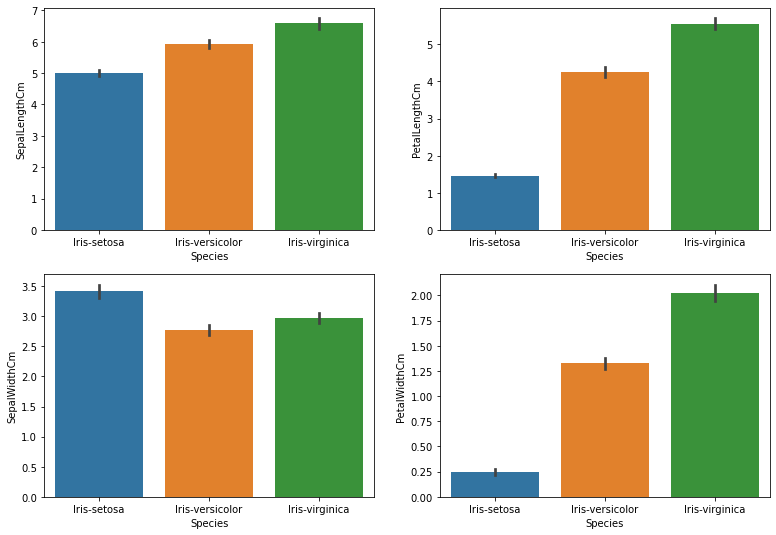

In [123]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.barplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.barplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,3)
sns.barplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,4)
sns.barplot(x="Species",y="PetalWidthCm",data=df)


# Building the Model

In [124]:
# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [125]:
data=pd.read_csv("Iris.csv")
data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

# Spliting dataset 

Training data : 75% <br>Testing data : 25%

In [126]:
# Spliting
train_var, test_var = train_test_split(data, test_size=0.25)

In [127]:
train_var.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica


In [128]:
test_var.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
23,24,5.1,3.3,1.7,0.5,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa


In [129]:
train_X = train_var[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_Y = train_var.Species

In [130]:
test_X = test_var[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y = test_var.Species

#### Why SVM?
Support Vector Machine (SVM) is a supervised learning algorithm used for classification tasks. It is used to find a hyperplane that maximally separates the different classes in the feature space by maximizing the margin, which is the distance between the hyperplane and the closest data points of each class. The points that are closest to the hyperplane are known as support vectors.<br>
It can handle non-linearly separable data using the kernel trick, which maps the input data into a higher-dimensional space.<br>
It's a powerful algorithm for the iris dataset, which is a multiclass dataset, SVM can be used for multi-class classification problems by using one-vs-all or one-vs-one approaches. It's important to scale the data before using it in the model and select the appropriate kernel and regularization parameter.

In [131]:
# Using Support Vecort Machine
model=svm.SVC()

In [132]:
model.fit(train_X,train_Y)
predict=model.predict(test_X)

In [133]:
sklearn.metrics.accuracy_score(predict,test_Y)

0.9736842105263158

#### Why Decision Tree?
Decision tree is a supervised learning algorithm that can be used for classification of the Iris dataset.<br>
It builds a tree-based model that partitions the Iris dataset into subsets and infers decision rules for each partition.<br>
It starts with the best attribute to split the dataset and continues to split based on attribute values of sepal length, width, petal length and width.<br>
The final decision tree will consist of decision rules for predicting the class label of an Iris flower based on its sepal length, width, petal length, and width.<br>
It is an easy to interpret and understand algorithm and can be used for the Iris dataset to classify the different species of Iris flowers.<br>
Prune the tree is important to avoid overfitting and to obtain the optimal decision tree.

In [134]:
#Decision Tree
model= DecisionTreeClassifier()

In [135]:
model.fit(train_X,train_Y)
predict=model.predict(test_X)

In [136]:
sklearn.metrics.accuracy_score(predict,test_Y)

0.9473684210526315

### Conclusion:->
I have used the Support Vector Machine algorithm and have got 97.36% accuracy and when we used the Decision Tree algorithm we got accuracy of 94.73%.